In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="whitegrid")

## 1. Load Dataset

In [2]:
file_path = "1739523823_ausapparalsales4thqrt2020/AusApparalSales4thQrt2020.csv"
df = pd.read_csv(file_path)

print("=== FIRST FIVE ROWS ===")
print(df.head())

print("\n=== DATA INFO ===")
df.info()

=== FIRST FIVE ROWS ===
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


## 2. Data Wrangling

In [3]:
print("\n=== NULL VALUES ===")
print(df.isna().sum())

print("\n=== NON-NULL SUMMARY ===")
print(df.notna().sum())

df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Unit'] = df['Unit'].fillna(df['Unit'].median())

df.dropna(subset=["State", "Group"], inplace=True)
df.head()


=== NULL VALUES ===
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

=== NON-NULL SUMMARY ===
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


## 3. Normalization

In [4]:
scaler = MinMaxScaler()
df[['Sales_norm', 'Units_norm']] = scaler.fit_transform(df[['Sales', 'Unit']])

df[['Sales', 'Sales_norm', 'Unit', 'Units_norm']].head()

,Sales,Sales_norm,Unit,Units_norm
0,20000,0.095238,8,0.095238
1,20000,0.095238,8,0.095238
2,10000,0.031746,4,0.031746
3,37500,0.206349,15,0.206349
4,7500,0.015873,3,0.015873


## 4. GroupBy Analysis

In [5]:
state_sales = df.groupby('State')['Sales'].sum()
group_sales = df.groupby('Group')['Sales'].sum()

print("=== TOTAL SALES BY STATE ===")
print(state_sales)

print("\n=== TOTAL SALES BY GROUP ===")
print(group_sales)

=== TOTAL SALES BY STATE ===
State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64

=== TOTAL SALES BY GROUP ===
Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64


## 5. Descriptive Statistics

In [6]:
print(df['Sales'].describe())
print(df['Unit'].describe())

print("Mean:", df['Sales'].mean())
print("Median:", df['Sales'].median())
print("Mode:", df['Sales'].mode()[0])
print("Std Dev:", df['Sales'].std())

count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64
Mean: 45013.5582010582
Median: 35000.0
Mode: 22500
Std Dev: 32253.506943966073


## 6. Highest / Lowest Sales Groups

In [7]:
highest_group = df.groupby("Group")['Sales'].sum().idxmax()
lowest_group = df.groupby("Group")['Sales'].sum().idxmin()

print("Highest Sales Group:", highest_group)
print("Lowest Sales Group:", lowest_group)

Highest Sales Group:  Men
Lowest Sales Group:  Seniors


## 7. Date / Time Processing

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Hour'] = df['Date'].dt.hour

weekly_report = df.groupby('Week')['Sales'].sum()
monthly_report = df.groupby('Month')['Sales'].sum()
quarterly_report = df.groupby('Quarter')['Sales'].sum()

weekly_report, monthly_report, quarterly_report

(Week
 40    15045000
 41    27002500
 42    26640000
 43    26815000
 44    21807500
 45    20865000
 46    21172500
 47    21112500
 48    21477500
 49    29622500
 50    31525000
 51    31655000
 52    31770000
 53    13792500
 Name: Sales, dtype: int64,
 Month
 10    114290000
 11     90682500
 12    135330000
 Name: Sales, dtype: int64,
 Quarter
 4    340302500
 Name: Sales, dtype: int64)

## 8. Data Visualization Dashboard

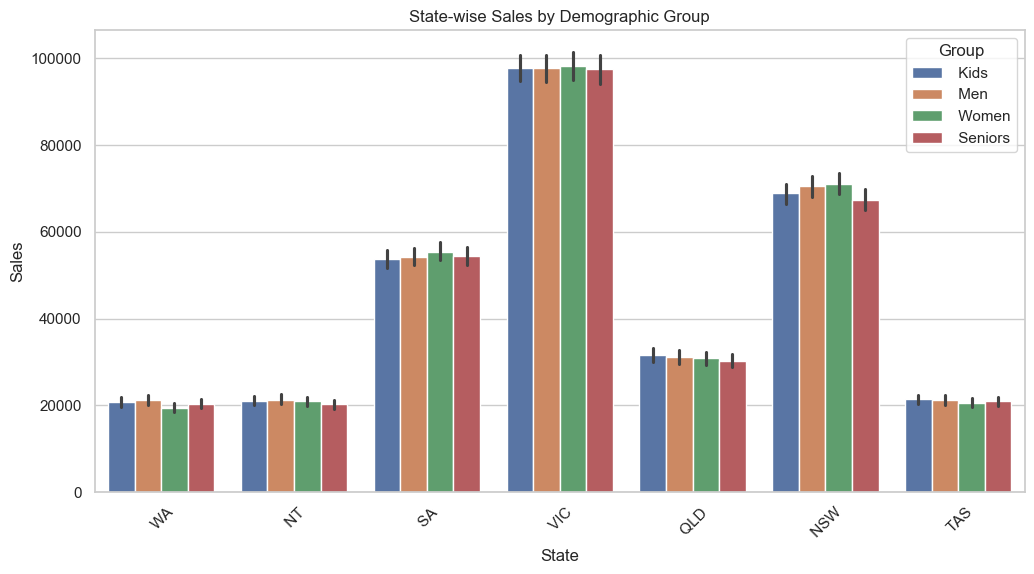

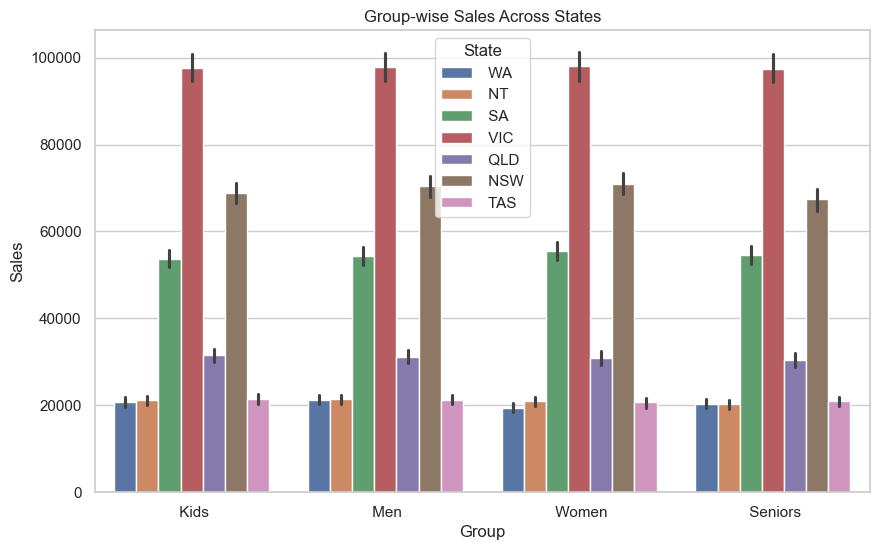

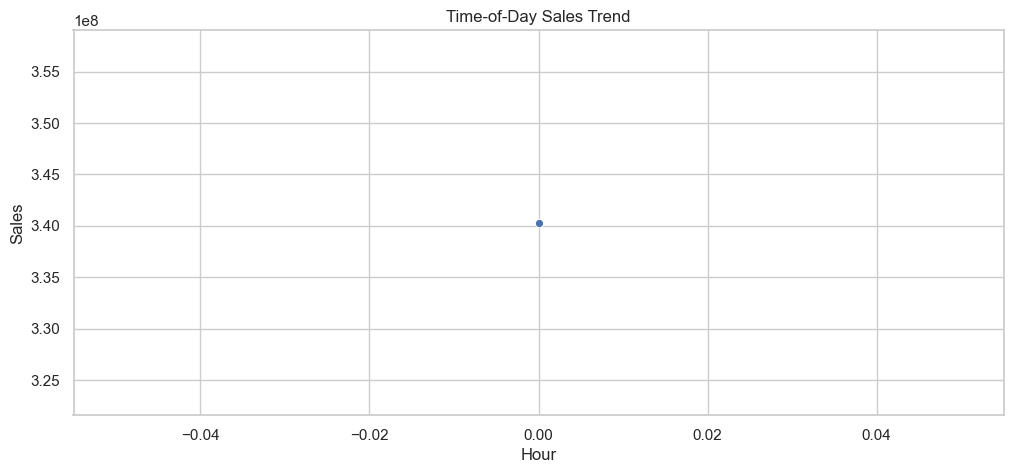

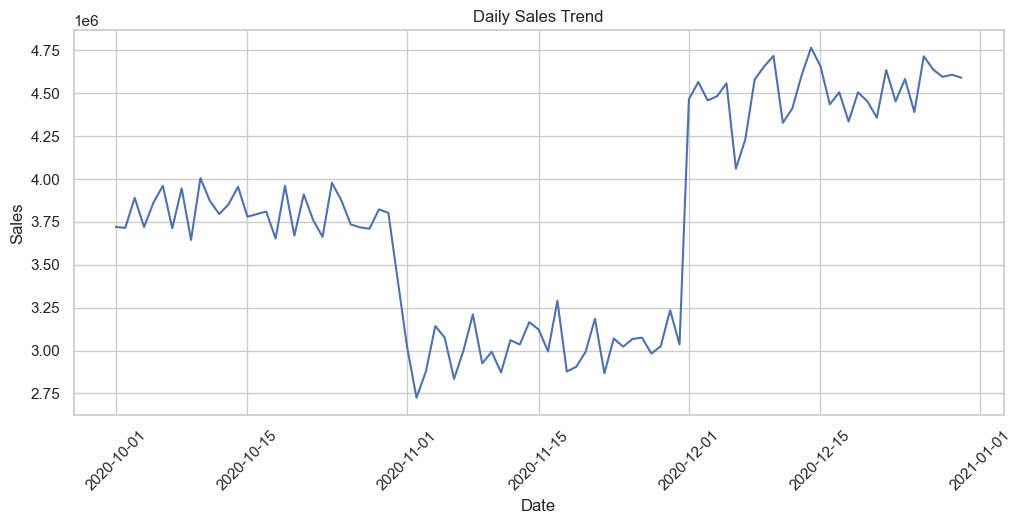

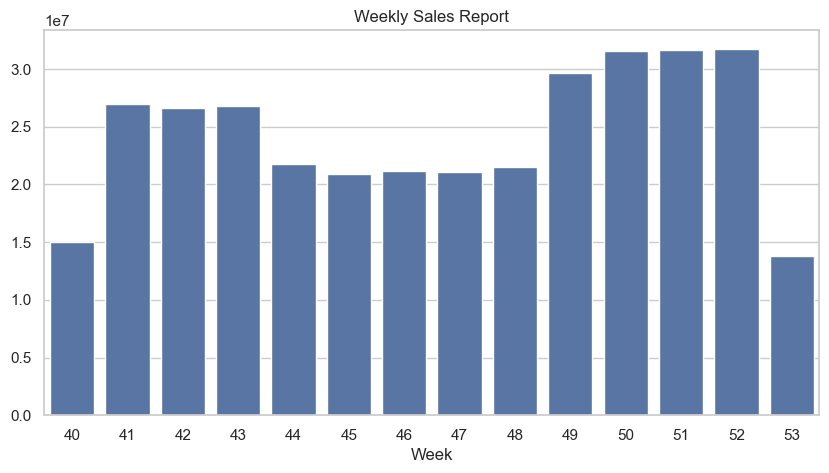

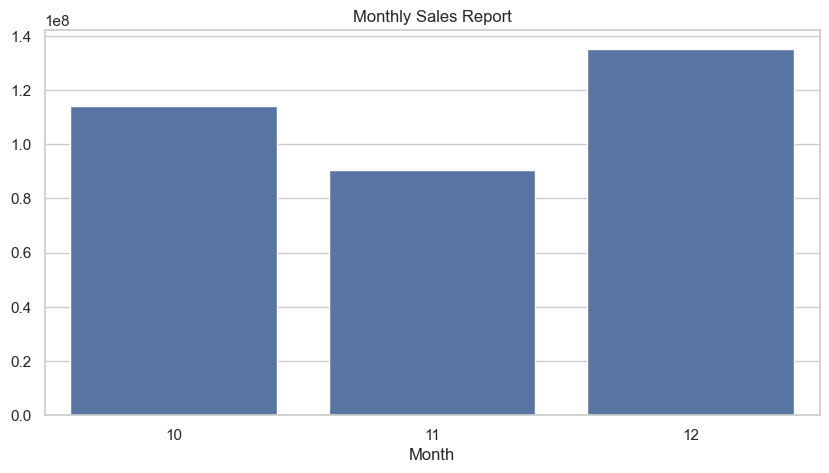

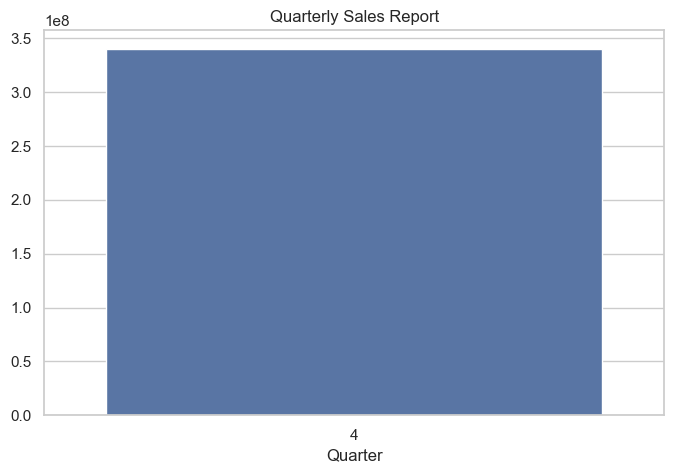

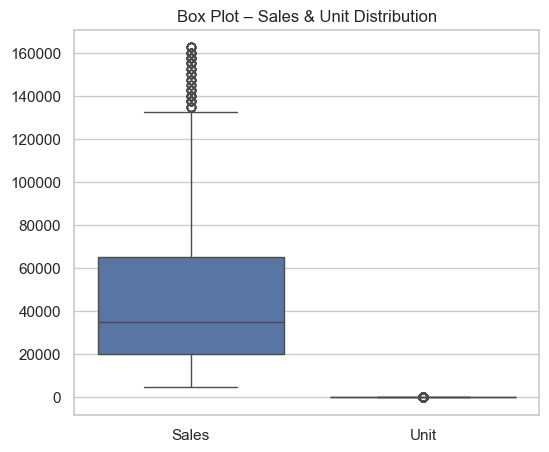

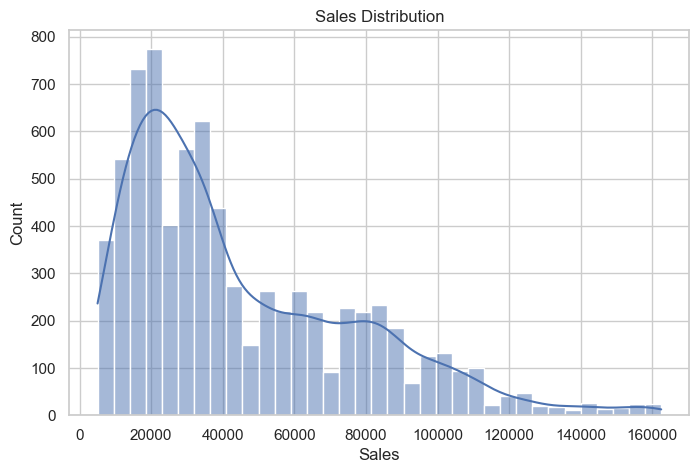

Dashboard Generation Complete


In [9]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="State", y="Sales", hue="Group")
plt.title("State-wise Sales by Demographic Group")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Group", y="Sales", hue="State")
plt.title("Group-wise Sales Across States")
plt.show()

plt.figure(figsize=(12,5))
hourly = df.groupby("Hour")['Sales'].sum().reset_index()
sns.lineplot(data=hourly, x="Hour", y="Sales", marker='o')
plt.title("Time-of-Day Sales Trend")
plt.show()

daily = df.groupby(df['Date'].dt.date)['Sales'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=daily, x='Date', y='Sales')
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=weekly_report.index, y=weekly_report.values)
plt.title("Weekly Sales Report")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_report.index, y=monthly_report.values)
plt.title("Monthly Sales Report")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=quarterly_report.index, y=quarterly_report.values)
plt.title("Quarterly Sales Report")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(data=df[['Sales', 'Unit']])
plt.title("Box Plot – Sales & Unit Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

print("Dashboard Generation Complete")